# Social Network Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statistics import mean

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
matrix = pd.read_csv('facebook_edges.csv')

### First insights about the data 

In [3]:
matrix.head()

,node1,node2
0,236,186
1,236,84
2,236,62
3,236,142
4,236,252


In [4]:
matrix.shape

(84243, 2)

In [5]:
matrix.describe()

,node1,node2
count,84243.000000,84243.000000
mean,2021.107867,2029.883848
std,893.325341,891.742901
min,1.000000,0.000000
25%,1390.000000,1376.000000
50%,2078.000000,2086.000000
75%,2608.000000,2593.000000
max,4038.000000,4037.000000


In [6]:
numpy_matrix = matrix.as_matrix()

In [7]:
numpy_matrix

array([[ 236,  186],
       [ 236,   84],
       [ 236,   62],
       ...,
       [4016, 4007],
       [3990, 4007],
       [4012, 3987]], dtype=int64)

In [8]:
import networkx as nx

In [9]:
# Instantiate the graph
G1 = nx.Graph()
# add node/edge pairs
G1.add_edges_from(numpy_matrix)

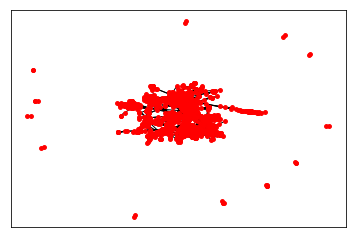

In [10]:
# draw the network G1

nx.draw_networkx(G1,with_labels=False,node_size=15,node_color='r')

In [11]:
G1.number_of_nodes()

3959

In [12]:
G1.number_of_edges()

84243

#   

#   

### Let's look closer on the data

#### What about seeing 200 edges ! That will clarify the picture.

#### I am about to look on a random sample of 200 edges

In [13]:
import random

In [14]:
matrix_for_shuffling = pd.read_csv('facebook_edges.csv')

In [15]:
numpy_matrix_for_shuffling = matrix_for_shuffling.as_matrix()

#### To have a real random sample we better shuffle the data before all 

In [16]:
numpy_matrix_shuffled = numpy_matrix_for_shuffling

In [17]:
np.random.shuffle(numpy_matrix_shuffled)

In [18]:
data_list = numpy_matrix_shuffled.tolist()

In [19]:
sample_list = random.sample(data_list,k=200)

In [20]:
sample_array = np.array(sample_list)

In [21]:
# Instantiate the graph
G_sample = nx.Graph()
# add node/edge pairs
G_sample.add_edges_from(sample_array)

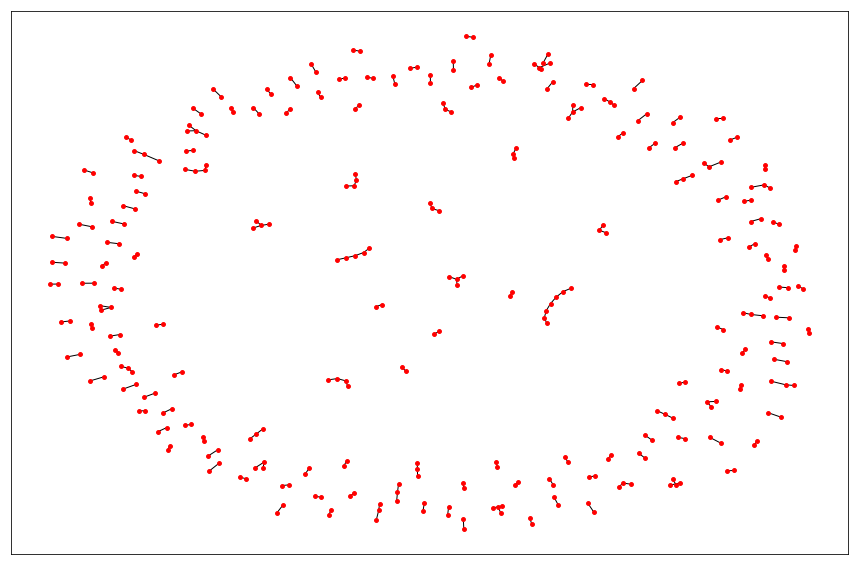

In [22]:
# draw the network G1
fig= plt.figure(figsize=(15,10))
nx.draw_networkx(G_sample,with_labels=False,node_size=15,node_color='r')

### Having a closer look but this time not randomly 

#### I am about to look on a smaller sample of the data with a focus on 3 nodes and theri neighbors

In [23]:
numpy_matrix 

array([[ 236,  186],
       [ 236,   84],
       [ 236,   62],
       ...,
       [4016, 4007],
       [3990, 4007],
       [4012, 3987]], dtype=int64)

In [24]:
sample_array = numpy_matrix[:89]

In [25]:
# Instantiate the graph
G_sample = nx.Graph()
# add node/edge pairs
G_sample.add_edges_from(sample_array)

In [26]:
def draw(G_sample):
    # draw the network G1
    fig= plt.figure(figsize=(15,10))
    nx.draw_networkx(G_sample,with_labels=False,node_size=15,node_color='b')
    return 

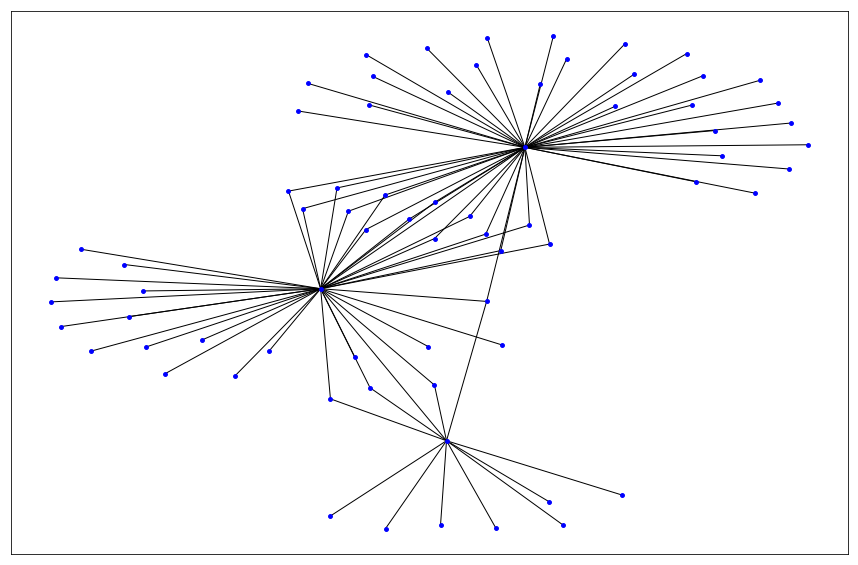

In [27]:
draw(G_sample)

#   

#   

### I will impelement some functions that will be used in needed cases

### 1) Degree Centrality 

#### Assumption: important nodes have many connections.
#### The most basic measure of centrality: number of neighbors.

In [28]:
def degree_centrality(G1):
    #Code to figure out the person who has the biggest number of neighbors 
    maximum = 0 
    node = 0
    degree_centrality = nx.degree_centrality(G1)
    for i in G1.nodes() : 
        if (degree_centrality[i]> maximum)  : 
            maximum = degree_centrality[i]
            node = i 
    #print(node)
    return node 

In [29]:
def top_percent_degree_centrality(G1 , per = 0.02):
    degree_centrality = nx.degree_centrality(G1)

    lis=[]
    dic = dict(degree_centrality)

    #Top per of the data 
    n= int(per * G1.number_of_nodes())

    for i in range (0,n) :
        maximum = 0 
        node = 0
        for elt in dic : 
            if dic[elt]> maximum  : 
                maximum = dic[elt]
                node = elt
            
        del dic[node]
        lis.append(node)
    lis_degree=lis
    #print(lis_degree)
    return lis_degree

### 2) Closeness centrality

#### Assumption: important nodes are close to other nodes.

In [30]:
def closeness_centrality(G1):
    maximum = 0 
    node = 0
    closeness_centrality = nx.closeness_centrality(G1)
    for i in G1.nodes() : 
        if closeness_centrality[i]> maximum  : 
            maximum = closeness_centrality[i]
            node = i 
    #print(node)
    return node 

In [31]:
def top_percent_closeness_centrality(G1 , per = 0.02 ):
    closeness_centrality = nx.closeness_centrality(G1)

    lis=[]
    dic = dict(closeness_centrality)

    #Top percent of the data 
    n= int(per * G1.number_of_nodes())

    for i in range (0,n) :
        maximum = 0 
        node = 0
        for elt in dic : 
            if dic[elt]> maximum  : 
                maximum = dic[elt]
                node = elt
            
        del dic[node]
        lis.append(node)
    lis_closeness=lis
    #print(lis_closeness)
    return lis_closeness

### 3) Betweenness Centrality

#### Assumption: important nodes connect other nodes.

In [32]:
def betweenness_centrality(G1):
    maximum = 0 
    node = 0
    betweenness_centrality = nx.betweenness_centrality(G1)
    for i in G1.nodes() : 
        if betweenness_centrality[i]> maximum  : 
            maximum = betweenness_centrality[i]
            node = i 
    #print(node)
    return node 

In [33]:
def top_percent_betweenness_centrality(G1 , per = 0.02):
    betweenness_centrality = nx.betweenness_centrality(G1)

    lis=[]
    dic = dict(betweenness_centrality)

    #Top per of the data 
    n= int(per * G1.number_of_nodes())

    for i in range (0,n) :
        maximum = 0 
        node = 0
        for elt in dic : 
            if dic[elt]> maximum  : 
                maximum = dic[elt]
                node = elt
            
        del dic[node]
        lis.append(node)
    lis_betweenness=lis
    #print(lis_betweenness)
    return lis_betweenness

### Analyzing the whole graph with some indicators 

In [34]:
List_degree_centrality_G1 = top_percent_degree_centrality(G1)

In [35]:
List_degree_centrality_G1[0]

2543

In [36]:
List_closeness_centrality_G1 = top_percent_closeness_centrality(G1)

In [37]:
List_closeness_centrality_G1[0]

1534

In [38]:
List_betweenness_centrality_G1 =top_percent_betweenness_centrality(G1)

In [39]:
List_betweenness_centrality_G1[0]

1085

#### Finding out the most influencer person on the graph 

In [40]:
# Most influencial persons in the graph overall 
# Considering a person is an influencer if he is among the top percent in the three classifications 

List = []
for node_i in List_degree_centrality_G1 : 
    for node_j in List_closeness_centrality_G1 : 
        if node_i == node_j :
            for node_k in List_betweenness_centrality_G1 : 
                if node_i == node_k : 
                    List.append(node_i)
                
List 

[1584]

In [41]:
[x for x in List_degree_centrality_G1 if x in List_closeness_centrality_G1 and x in List_betweenness_centrality_G1]

[1584]

##### 1584 is the biggest influencer of the whole graph

#   

### Extracting Communities from the Data 

#### Rather than looking for influencers in all the graph we decide to focus on influencers on each community 

In [42]:
import community 

In [43]:
#first compute the best partition
partition = community.best_partition(G1)

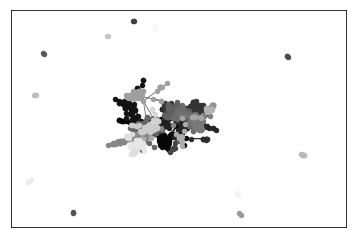

In [44]:
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G1)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G1, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G1, pos, alpha=0.5)
plt.show()

In [45]:
count

40.0

#### The algorithm detected 40 communities 

In [46]:
# list of lists where each list contain nodes of a single community 
list_of_communities=[]
count = 0
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    list_of_communities.append(list_nodes)

### Focusing on one single community among the 40 communities 

##### Extracting a graph representing one single community :  'G_sample' from the whole graph  'G1'

In [47]:
# number of community
k = 0 

In [48]:
# number of nodes in the k th community 
len(list_of_communities[k])

241

In [49]:
numpy_matrix

array([[ 236,  186],
       [ 236,   84],
       [ 236,   62],
       ...,
       [4016, 4007],
       [3990, 4007],
       [4012, 3987]], dtype=int64)

In [50]:
sample_array = np.array(numpy_matrix)

In [51]:
# number of nodes in the k th community 
len(list_of_communities[k])

241

In [52]:
list_eges_community_k = []
for i in range(sample_array.shape[0]): 
    if sample_array[i][0] in list_of_communities[k] : 
        if sample_array[i][1] in list_of_communities[k] : 
            list_eges_community_k.append([sample_array[i][0],sample_array[i][1]])

In [53]:
# creating an array of the k th community 
sample_array=np.array(list_eges_community_k)

In [54]:
# number of edges in the community 
sample_array.shape

(2170, 2)

In [55]:
# creating the G_sample graph of the k th community 

# Instantiate the graph
G_sample = nx.Graph()
# add node/edge pairs
G_sample.add_edges_from(sample_array)

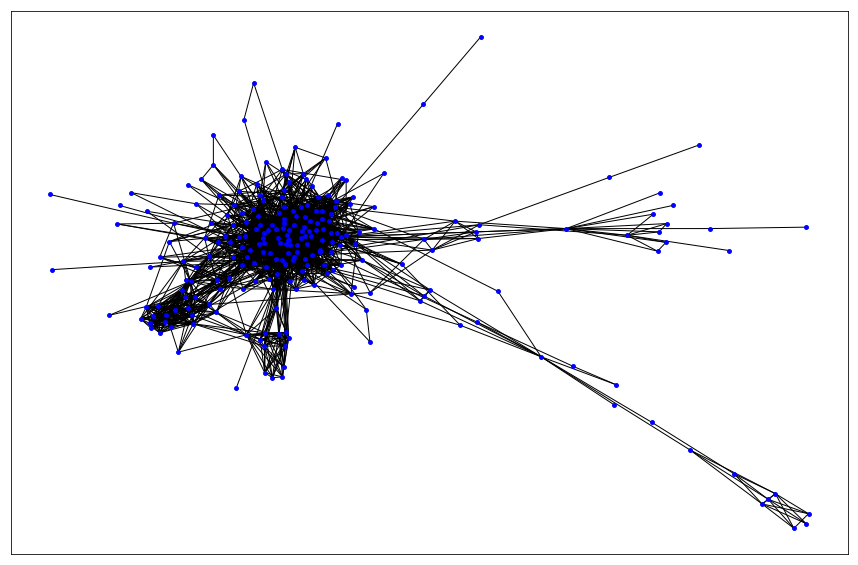

In [56]:
draw(G_sample)

### Analyzing on one single community 

#### Looking for the influencers in on single community 

##### Finding the top 2 percent nodes in the centrality parameter classification 

In [57]:
def color_nodes (list) :
    # given a list of nodes it colors the list of nodes in blue and the rest in green 
    color_map = []
    for node in G_sample :
        if node in list :
            color_map.append('red')
        else: color_map.append('blue')
    fig= plt.figure(figsize=(18,14))
    nx.draw(G_sample,node_color = color_map,with_labels=False,node_size=18,edge_color='Gray',alpha=0.8)
    plt.show()

In [58]:
# number of nodes in the k th community 
len(list_of_communities[k])

241

In [59]:
# we will have : 2 percent of len(list_of_communities[k]) , nodes 

#### Degree centrality 

In [60]:
List_degree_centrality = top_percent_degree_centrality(G_sample)

In [61]:
degree_centrality = nx.degree_centrality(G_sample)

In [62]:
# sorted list of top nodes considering the degree centraliy in the k th community 
List_degree_centrality

[56, 67, 271, 322]

In [63]:
# best degree centrality 
degree_centrality[List_degree_centrality[0]]

0.31666666666666665

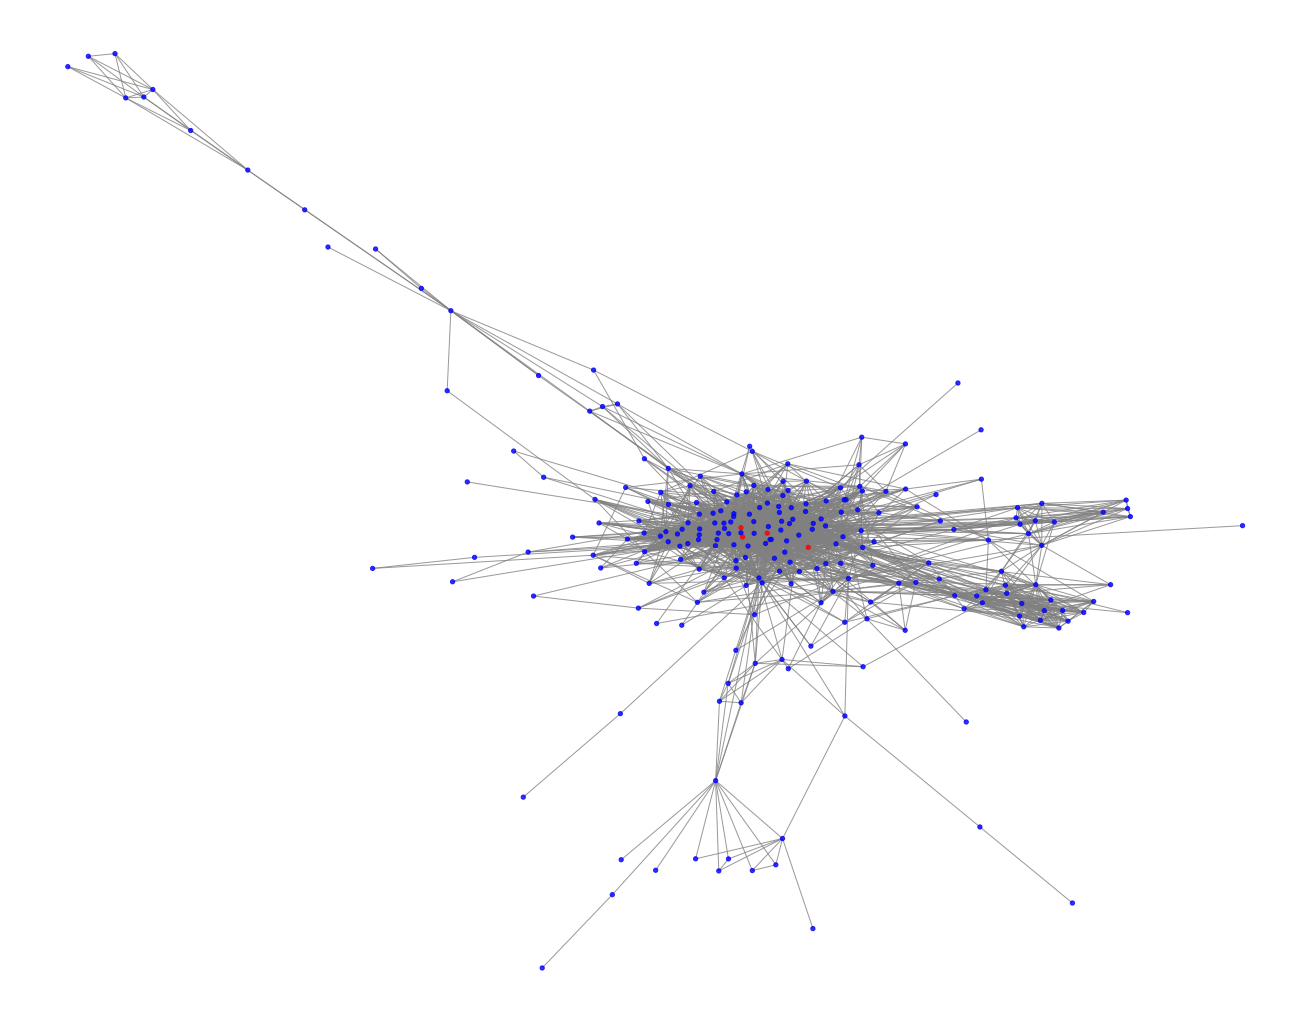

In [64]:
color_nodes(List_degree_centrality)

#### Closeness centrality 

In [65]:
List_closeness_centrality = top_percent_closeness_centrality(G_sample)

In [66]:
# sorted list of top nodes considering the closeness centraliy in the k th community 
List_closeness_centrality

[25, 67, 119, 277]

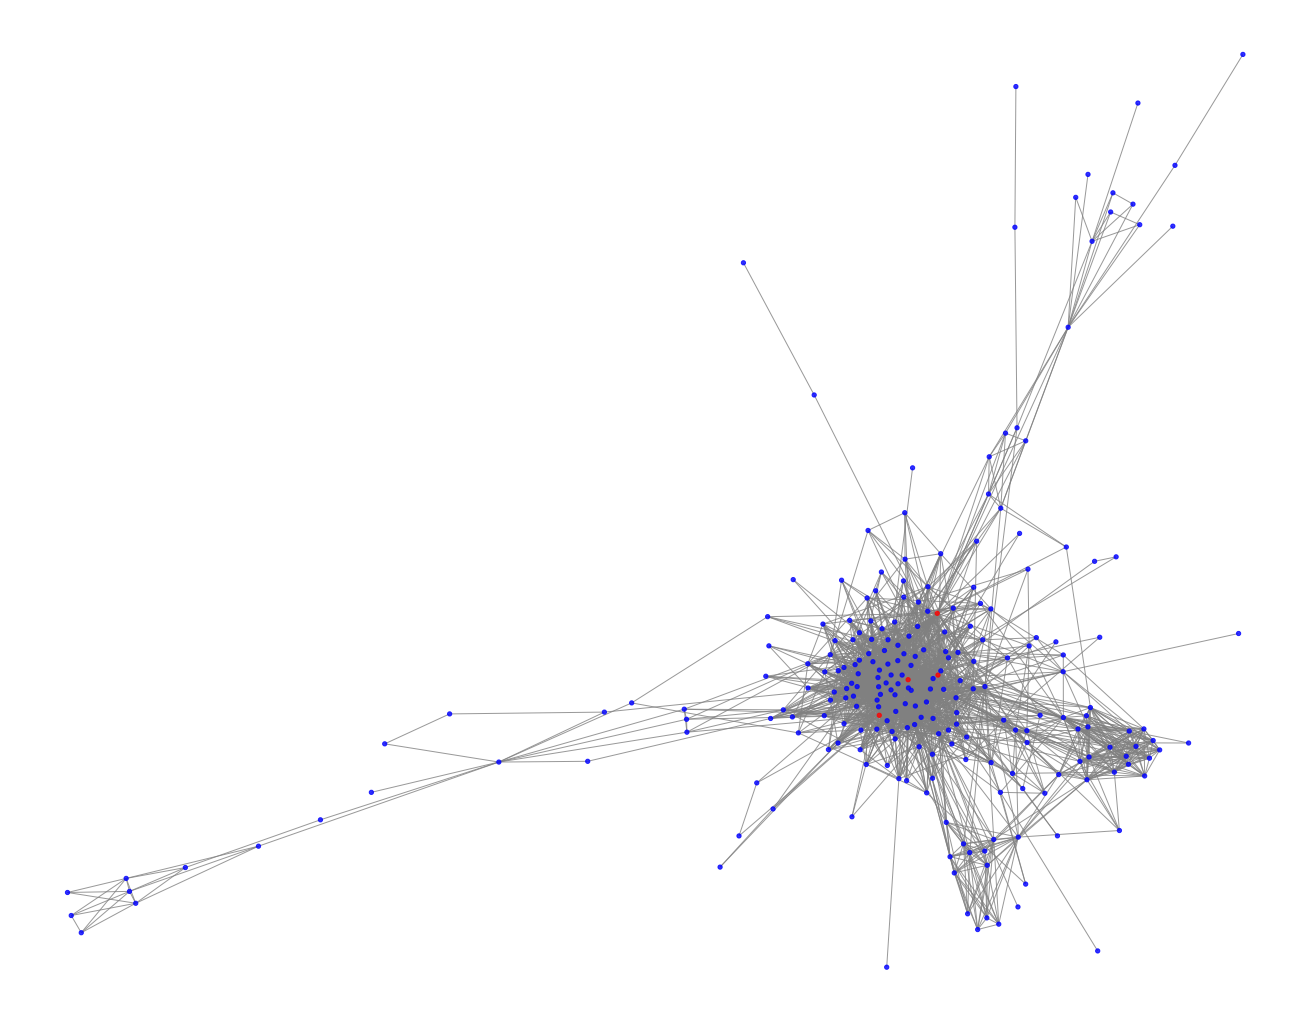

In [67]:
color_nodes(List_closeness_centrality)

#### Betweenness centrality 

In [68]:
List_betweenness_centrality = top_percent_betweenness_centrality(G_sample)

In [69]:
# sorted list of top nodes considering the betweenness centraliy in the k th community 
List_betweenness_centrality

[119, 25, 23, 171]

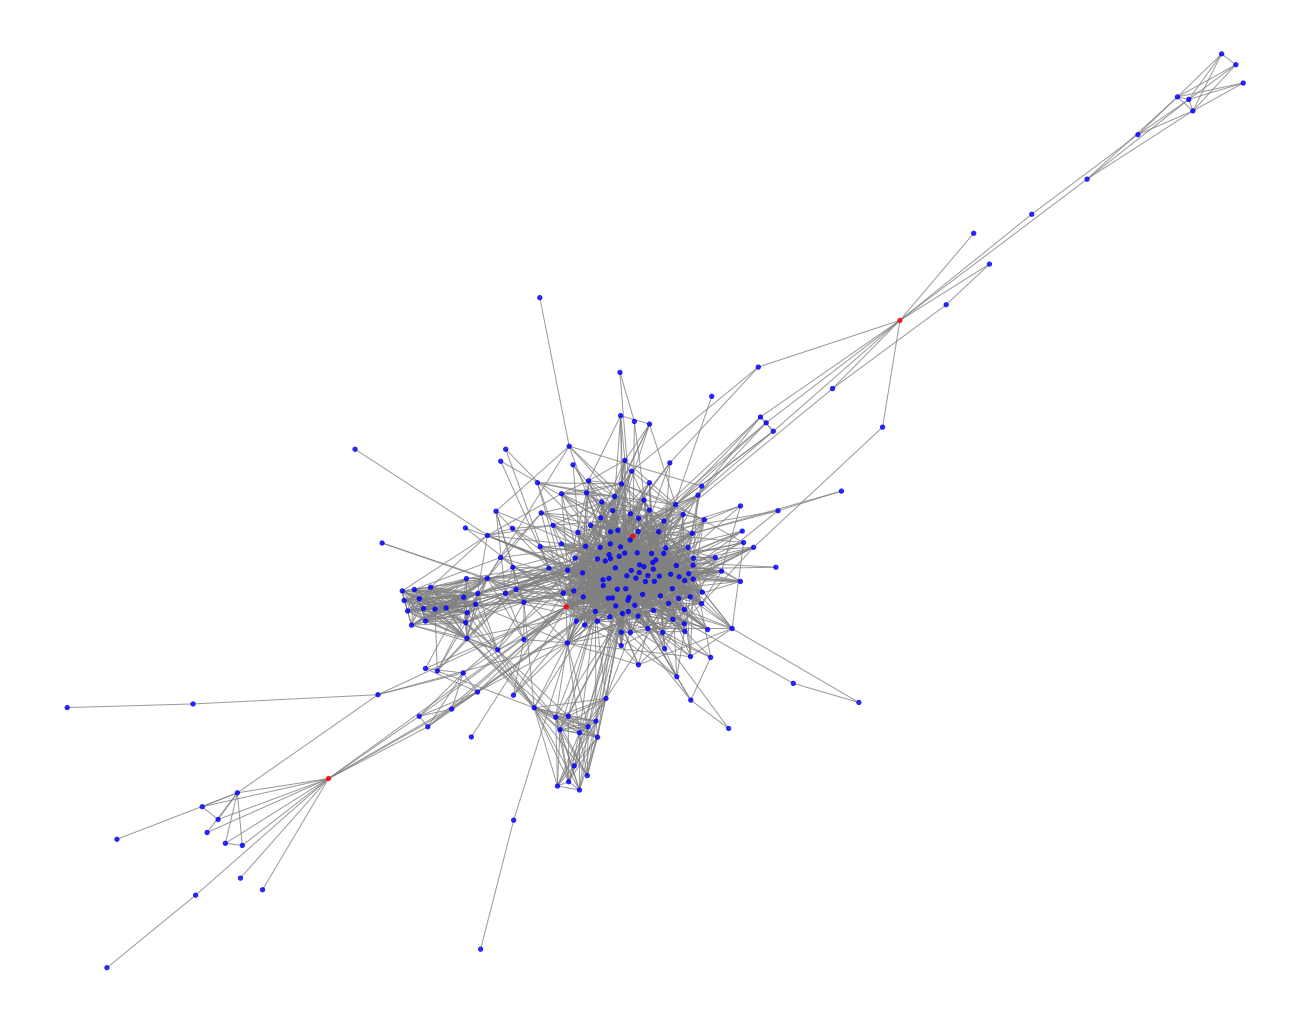

In [70]:
color_nodes(List_betweenness_centrality)

## A look on the communities 

### Details about communities 

In [71]:
# function to calculate the avg of the three parameters of centrality for the k th community 

def extracting_graph_community (k,list_of_communities): 
    sample_array = np.array(numpy_matrix)

    list_edges_community_k = []
    for i in range(sample_array.shape[0]): 
        if sample_array[i][0] in list_of_communities[k] : 
            if sample_array[i][1] in list_of_communities[k] : 
                list_eges_community_k.append([sample_array[i][0],sample_array[i][1]])
            
    # creating an array of the k th community 
    sample_array=np.array(list_eges_community_k)

    # creating the G_sample graph of the k th community 
    # Instantiate the graph
    G_sample = nx.Graph()
    # add node/edge pairs
    G_sample.add_edges_from(sample_array)
    
    degree_centrality = nx.degree_centrality(G_sample)
    closeness_centralirty = nx.closeness_centrality(G_sample)
    betweenness_centrality = nx.betweenness_centrality(G_sample)
    
    avg_degree = mean(degree_centrality.values())
    avg_closeness = mean(closeness_centralirty.values())
    avg_betweenness = mean(betweenness_centrality.values())
    
    is_connected = nx.is_connected(G_sample)
    number_componenets = nx.number_connected_components(G_sample)
    
    #if is_connected : 
        #radius = nx.radius(G_sample)
        #diameter = nx.diameter(G_sample)
        #avg_shortest_path = nx.average_shortest_path_length(G_sample)
        
    #else : 
        #radius = 9999 
        #diameter = 9999 
        #avg_shortest_path = 9999 
    
    
    smallest_bridge_number = nx.node_connectivity(G_sample)
    
    return (avg_degree,avg_closeness,avg_betweenness,is_connected,number_componenets,smallest_bridge_number)

In [72]:
list_of_degrees = []
list_of_closeness = [] 
list_of_betweenness = [] 
list_of_radius = [] 
list_of_diameter = [] 
list_of_is_connected = [] 
list_of_number_of_components = [] 
list_of_number_of_bridges = [] 
list_of_bridges = []
list_of_avg_shortest_path = []

for k in range(0,len(list_of_communities)) :
    tuple = extracting_graph_community (k,list_of_communities)
    
    list_of_degrees.append(tuple[0])
    list_of_closeness.append(tuple[1])
    list_of_betweenness.append(tuple[2])
    
    #list_of_radius.append(tuple[3])
    #list_of_diameter.append(tuple[4])
    
    list_of_is_connected.append(tuple[3])
    list_of_number_of_components.append(tuple[4])
    
    list_of_number_of_bridges.append(tuple[5])
    
    #list_of_avg_shortest_path.append(tuple[8])

In [73]:
len(list_of_degrees)

40

In [74]:
len(list_of_number_of_components)

40

In [75]:
len(list_of_number_of_bridges)

40

In [76]:
# Size of each community
list_of_sizes = [len(com) for com in list_of_communities]

In [77]:
list_of_ids = [i for i in range (0,len(list_of_number_of_bridges))]

In [78]:
len(list_of_ids)

40

In [79]:
dic = {'Community_Id' :list_of_ids , 'Community_Size' : list_of_sizes , 'Avg_Deg_Cent' : list_of_degrees , 'Avg_Clo_Cent' : list_of_closeness , 'Avg_Bet_Cent' : list_of_betweenness , 'Is_Connected' : list_of_is_connected,'Number_Components' : list_of_number_of_components, 'Number_Bridges' : list_of_number_of_bridges}

In [80]:
community_details = pd.DataFrame(dic)

In [81]:
community_details.head()

,Community_Id,Community_Size,Avg_Deg_Cent,Avg_Clo_Cent,Avg_Bet_Cent,Is_Connected,Number_Components,Number_Bridges
0,0,241,0.075035,0.369545,0.007713,True,1,1
1,1,275,0.090261,0.239280,0.001231,False,2,0
2,2,76,0.070169,0.186938,0.000877,False,3,0
3,3,73,0.062329,0.156526,0.000626,False,4,0
4,4,237,0.074576,0.134944,0.000282,False,5,0


#### I will drop the radius / the diameter / the avg shortest path

In [82]:
# considering only the communities with more nodes 
table = community_details[community_details['Community_Size']>10]

In [83]:
# Number of communities considered 
print(table.shape[0])

23


In [84]:
table_without_id=table.drop(columns=['Is_Connected','Community_Id'])

In [85]:
table_without_id

,Community_Size,Avg_Deg_Cent,Avg_Clo_Cent,Avg_Bet_Cent,Number_Components,Number_Bridges
0,241,0.075035,0.369545,0.007713,1,1
1,275,0.090261,0.239280,0.001231,2,0
2,76,0.070169,0.186938,0.000877,3,0
3,73,0.062329,0.156526,0.000626,4,0
4,237,0.074576,0.134944,0.000282,5,0
5,363,0.044578,0.101065,0.000208,6,0
7,515,0.027362,0.084162,0.000143,8,0
8,393,0.025192,0.073472,0.000093,9,0
14,123,0.022614,0.065743,0.000079,15,0
15,298,0.018639,0.056255,0.000064,16,0


In [86]:
table_without_id.describe()

,Community_Size,Avg_Deg_Cent,Avg_Clo_Cent,Avg_Bet_Cent,Number_Components,Number_Bridges
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,169.130435,0.029429,0.085797,0.000511,17.608696,0.043478
std,141.753404,0.025783,0.083238,0.001600,11.252229,0.208514
min,19.000000,0.010476,0.031845,0.000024,1.000000,0.000000
25%,46.500000,0.011968,0.036430,0.000030,7.000000,0.000000
50%,137.000000,0.015728,0.048284,0.000048,18.000000,0.000000
75%,258.000000,0.035970,0.092613,0.000175,26.000000,0.000000
max,515.000000,0.090261,0.369545,0.007713,36.000000,1.000000


## A look on the biggest community on the Network 

### Turning to focusing on single community 

##### This time I will take the biggest community : with id : 7

In [87]:
sample_array=np.array(numpy_matrix)

In [88]:
# number of community
k = 7 

In [89]:
# number of nodes in the k th community 
len(list_of_communities[k])

515

In [90]:
list_eges_community_k = []
for i in range(sample_array.shape[0]): 
    if sample_array[i][0] in list_of_communities[k] : 
        if sample_array[i][1] in list_of_communities[k] : 
            list_eges_community_k.append([sample_array[i][0],sample_array[i][1]])

In [91]:
# creating an array of the k th community 
sample_array=np.array(list_eges_community_k)

In [92]:
# number of edges in the community 
sample_array.shape

(8133, 2)

In [93]:
# creating the G_sample graph of the k th community 

# Instantiate the graph
G_sample = nx.Graph()
# add node/edge pairs
G_sample.add_edges_from(sample_array)

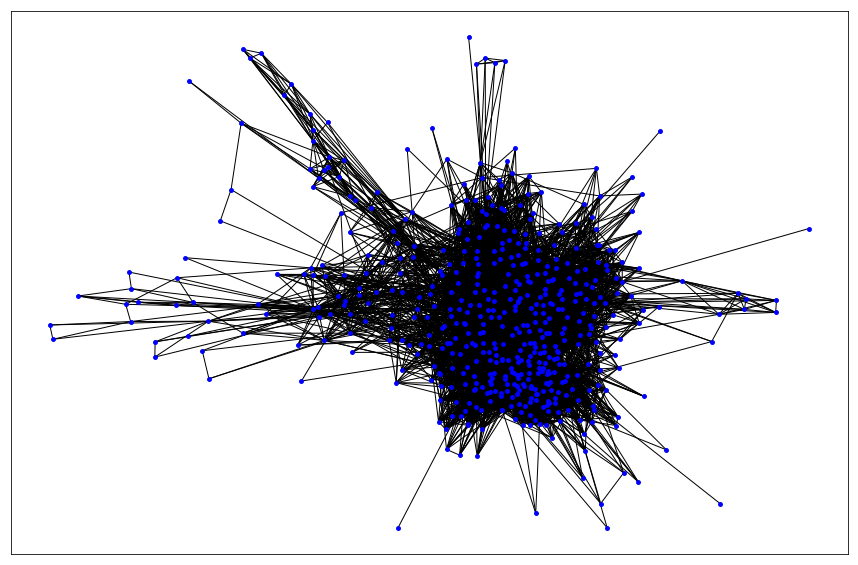

In [94]:
draw(G_sample)

#### Looking for the influencers in on single community 

##### Finding the top 10 percent nodes in the centrality parameter classification 

#### Degree centrality 

In [95]:
List_degree_centrality = top_percent_degree_centrality(G_sample, per = 0.1)

In [96]:
degree_centrality = nx.degree_centrality(G_sample)

In [97]:
# sorted list of top nodes considering the degree centraliy in the k th community 
List_degree_centrality

[3101,
 3291,
 2742,
 3082,
 3397,
 3320,
 3434,
 3280,
 3116,
 2863,
 2951,
 3051,
 2719,
 2661,
 2793,
 2778,
 2716,
 3330,
 3201,
 3154,
 3035,
 3150,
 2730,
 3038,
 3076,
 3252,
 3198,
 3152,
 3351,
 3132,
 2833,
 3350,
 2849,
 3185,
 2828,
 3060,
 2901,
 3344,
 3347,
 3396,
 3049,
 3360,
 2973,
 2748,
 3267,
 3172,
 2992,
 3002,
 3277,
 2904,
 3140]

In [98]:
# best degree centrality 
degree_centrality[List_degree_centrality[0]]

0.23540856031128404

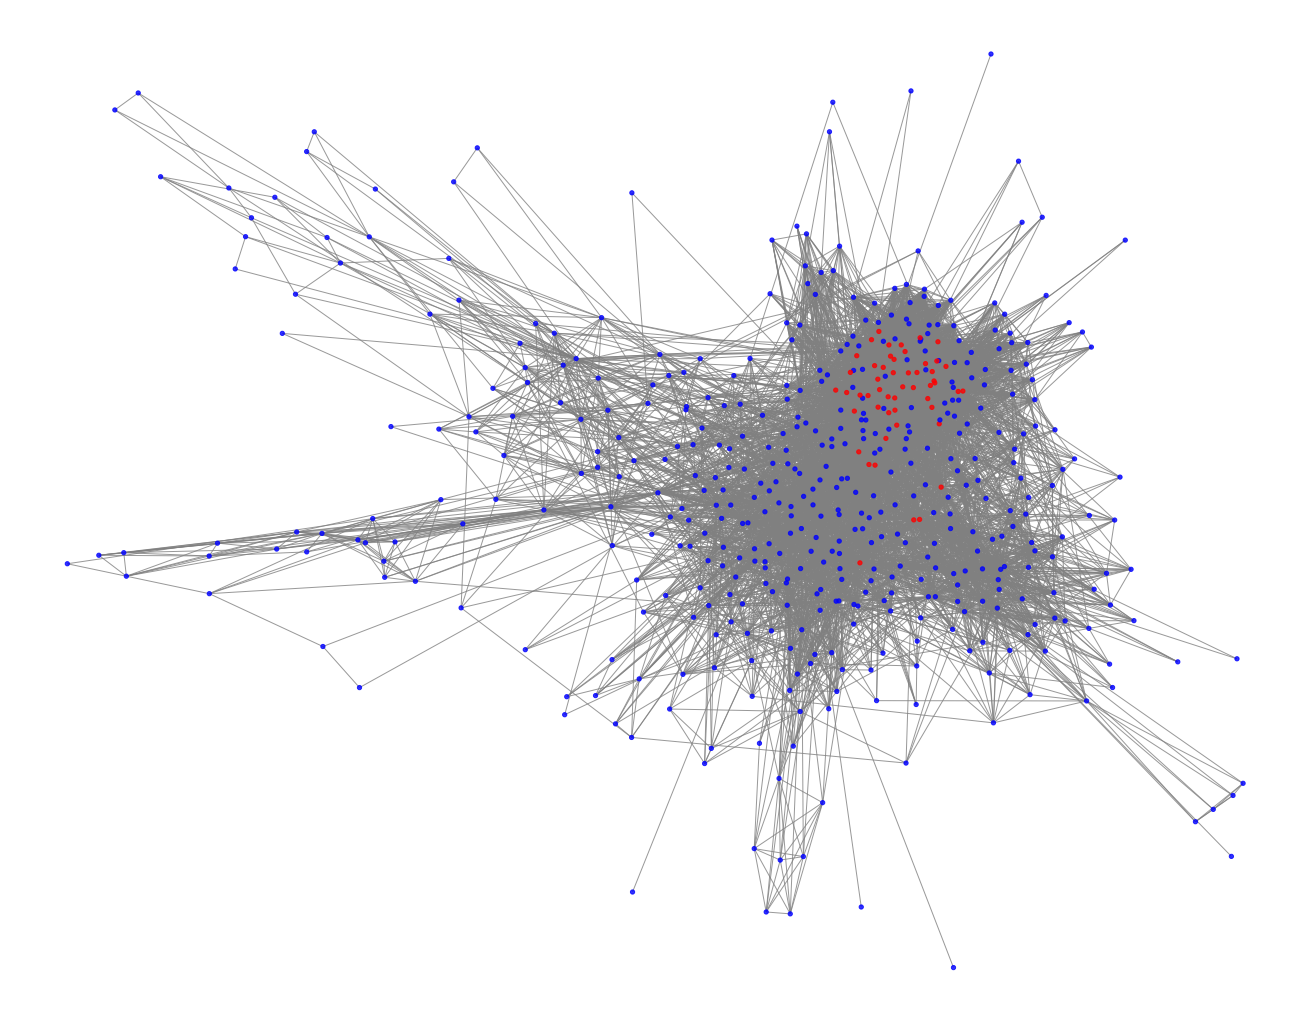

In [99]:
color_nodes(List_degree_centrality)

#### Closeness centrality 

In [100]:
List_closeness_centrality = top_percent_closeness_centrality(G_sample , per = 0.1)

In [101]:
# sorted list of top nodes considering the closeness centraliy in the k th community 
List_closeness_centrality

[3101,
 2951,
 2730,
 3397,
 3291,
 2716,
 3082,
 3002,
 2793,
 3150,
 3136,
 3154,
 2863,
 3302,
 3051,
 3038,
 2742,
 3434,
 3342,
 3198,
 3320,
 3274,
 3263,
 3330,
 3253,
 3201,
 3280,
 3027,
 3076,
 3140,
 2661,
 2778,
 3406,
 3116,
 3152,
 3347,
 3019,
 3214,
 2781,
 2665,
 3017,
 3350,
 3321,
 3353,
 2719,
 3034,
 3252,
 2901,
 3185,
 3403,
 2833]

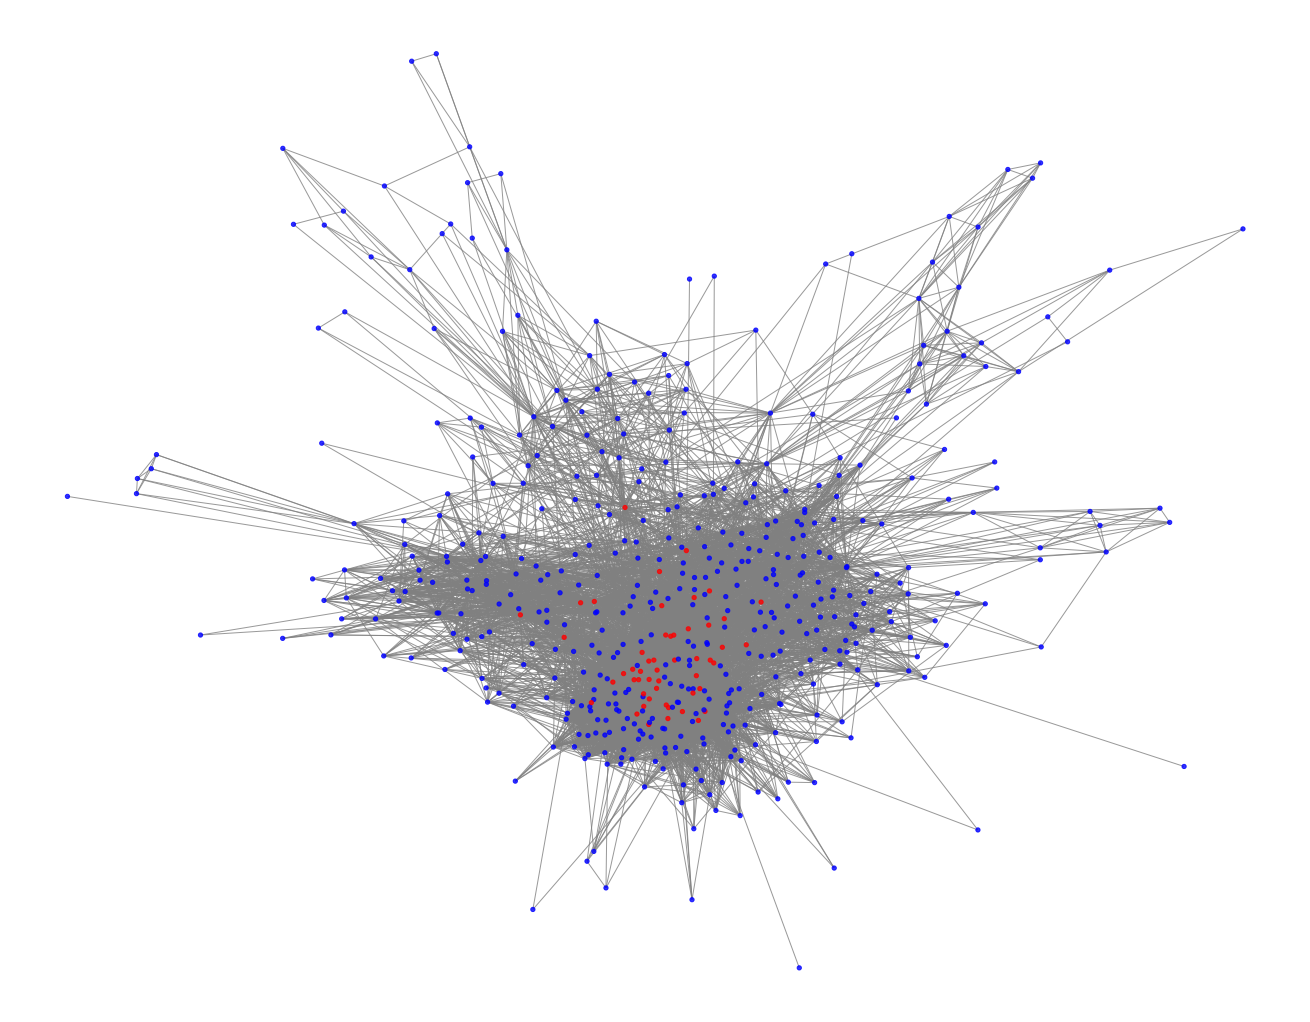

In [102]:
color_nodes(List_closeness_centrality)

#### Betweenness centrality 

In [103]:
List_betweenness_centrality = top_percent_betweenness_centrality(G_sample , per = 0.1)

In [104]:
# sorted list of top nodes considering the betweenness centraliy in the k th community 
List_betweenness_centrality

[1505,
 3263,
 2951,
 3072,
 2730,
 3077,
 2863,
 3256,
 3020,
 3154,
 2999,
 3302,
 3101,
 3019,
 3397,
 3327,
 3136,
 2716,
 1534,
 2724,
 3002,
 2734,
 3291,
 1642,
 3214,
 3274,
 3385,
 3280,
 3140,
 3201,
 3051,
 3005,
 2780,
 3320,
 3027,
 3233,
 2781,
 3179,
 3342,
 3258,
 3248,
 3253,
 3330,
 3011,
 1171,
 3366,
 3198,
 3185,
 1666,
 2904,
 3038]

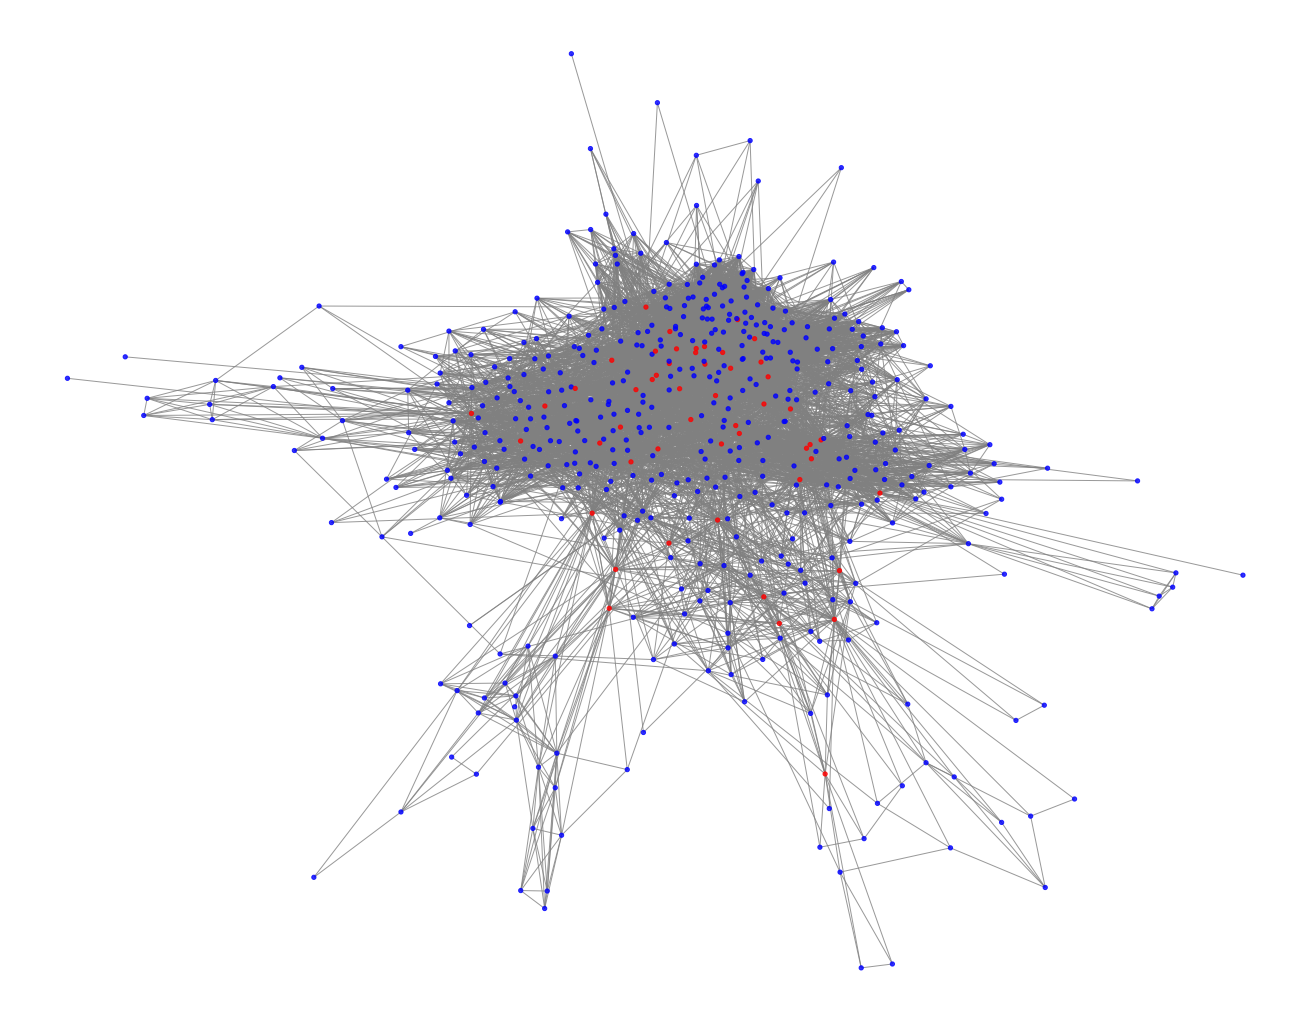

In [105]:
color_nodes(List_betweenness_centrality)

In [106]:
# The most influencers on the 7th community : 
[x for x in List_degree_centrality if x in List_closeness_centrality and x in List_betweenness_centrality]

[3101,
 3291,
 3397,
 3320,
 3280,
 2863,
 2951,
 3051,
 2716,
 3330,
 3201,
 3154,
 2730,
 3038,
 3198,
 3185,
 3002,
 3140]